<a href="https://colab.research.google.com/github/sk-haghighi/PDFTableExtract/blob/master/detection_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading original image to display

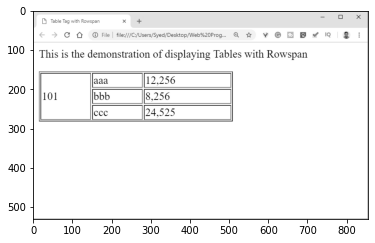

In [2]:
import cv2
import matplotlib.pyplot as plt
file=r'/content/example.png'
img = cv2.imread(file,0)
plot1 = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Inverted Image with global thresh holding

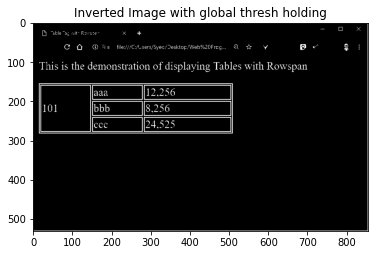

In [3]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

## Inverted Image with otsu thresh holding

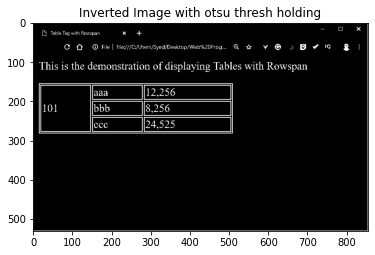

In [4]:
img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin1_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

## Inverted image with both global and Otsu thresholding

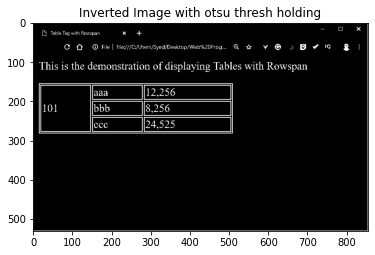

In [5]:
img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

## Create a rectangular structuring element

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
print(kernel)

[[1 1]
 [1 1]]


# Morphological Operations

## Create a new structuring element to perform erosion on the image

First we need to get the vertical lines.

We create a vertical kernel with kernel width 1 and height the number of columns in image array divided by 200.

Erosion makes the pixel 1 only if all the pixels under kernel are 1.

We perform erosion for 5 iterations with the vertical kernel.

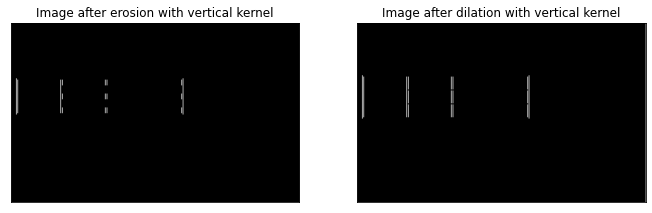

In [7]:
import numpy as np
plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=3)
plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=3)
plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])

plt.show()

Dilation will make the pixel 1, if at least one of the pixels under the kernel is 1.

Similarly lets do the same with a horizontal lines to get the horizontal lines.

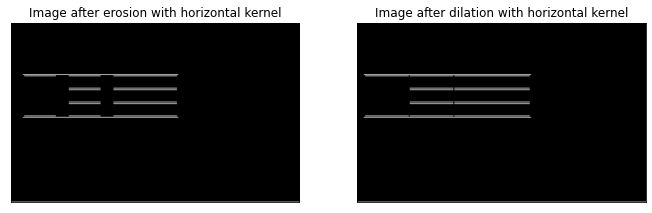

In [8]:
plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

plt.show()

## Now we add the two images

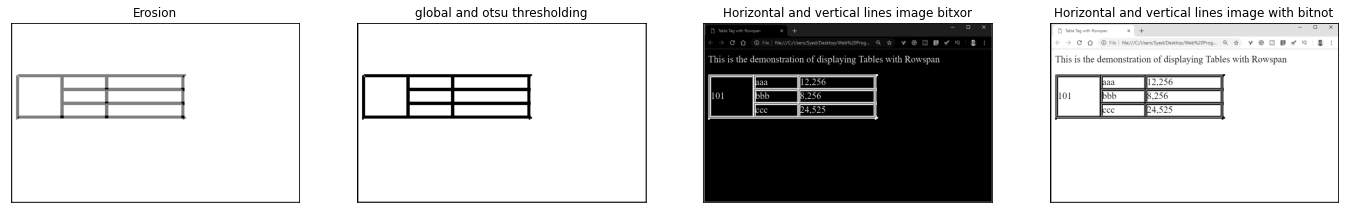

In [9]:
plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

plt.show()

In [10]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 7.7 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,696 kB/s)
debconf: unable to initi

In [11]:
import pytesseract

## Let's get the contours from the grid that we have obtained by adding the horizontal and vertical lines.

In [12]:
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

## Bounding Boxes

To get the coordinates of different boxes

In [13]:
boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

Here we draw the contours on our image and also store them in list boxes. It is stored as a list (x,y,w,h) : x and y beind coordinates of top left corner and w and h being width and height of the box respectively.

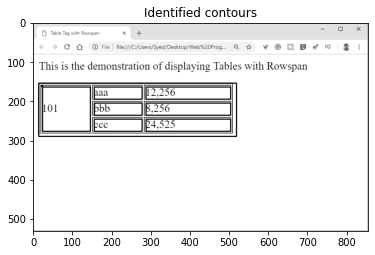

In [14]:
boxes = []
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if (w<1000 and h<500):
    image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    boxes.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

## Getting the rows and columns

## To store rows and columns :

- Now we add rows and columns.
- We calculate the mean height of all boxes.
- Initially, we append the first box to the columns list.
- The columns list is essentialy a temporary list.
- We assign previous box to the first box as well.
- We will loop through the remaining boundingBoxes list.
- At each iteration, we check if the y coordinate of the top left corner of the current box is less than the y coordinate of the previous box added with half the mean of all heights.
- If yes :
    - The current box is appended to columns list.
    - The current box is assigned to previous box.
    - Next we check if we are at the last index. If yes :
      - We append the entire column to rows list.
- If no :
    - We append the columns list to rows.
    - We assign the columns list to empty as this will start a new empty columns list.
    - We assign the current box to the previous box variable.
    - We append the current box to the empty column list we just created.


In [15]:
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
  if(boxes[i][1]<=previous[1]+mean/2):
    columns.append(boxes[i])
    previous=boxes[i]
    if(i==len(boxes)-1):
      rows.append(columns)
  else:
    rows.append(columns)
    columns=[]
    previous = boxes[i]
    columns.append(boxes[i])
print("Rows")
for row in rows:
  print(row)

96.3
Rows
[[14, 153, 505, 136], [20, 159, 4, 2], [288, 163, 216, 31], [156, 163, 122, 31], [24, 163, 122, 113], [288, 204, 216, 31], [156, 204, 122, 31], [288, 245, 216, 31], [156, 245, 122, 31]]


Lets get the total cells in each row

In [16]:
total_cells=0
for i in range(len(row)):
  if len(row[i]) > total_cells:
    total_cells = len(row[i])
print(total_cells)

4


# Lets get the centre of cell

- We add the width of cell to left bottom x coordinate to the the x coordinate of centre of cell.

In [17]:
center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
print(center)

IndexError: ignored

In [ ]:
center=np.array(center)
center.sort()
print(center)

[ 52 124 214]


# Now we create a list of the coordinates of the boxes

In [ ]:
boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows[i][j])
    boxes_list.append(l)
for box in boxes_list:
  print(box)

[[[14, 153, 261, 177], [20, 159, 4, 2], [24, 163, 57, 31]], [[91, 163, 67, 31]], [[168, 163, 92, 31]], []]
[[[24, 204, 57, 31]], [[91, 204, 67, 31]], [[168, 204, 92, 31]], []]
[[[24, 245, 57, 31]], [[91, 245, 67, 31]], [[168, 245, 92, 31]], []]
[[[24, 286, 57, 31]], [[91, 286, 67, 31]], [[168, 286, 92, 31]], []]


## Extract image from the boxes and get the contents using pytesseract

- We extract the region of interest from the image.
- For the cell we resize it, then perform morphological operations on the extracted cell area to remove noise.
- Finally, we use pytesseract to convert the image to a string.
- We append the strings in each row first to temporary string s with spaces, and then we append this temporary string to the final dataframe.

In [ ]:
dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
                roi = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion)
                s = s +" "+ out
            dataframe_final.append(s)
print(dataframe_final)

['  \n\nIo I I\n\x0c \x0c S.No\n\x0c', ' Name\n\x0c', ' Amount\n\x0c', ' ', ' 101\n\x0c', ' aaa\n\x0c', ' 12,256\n\x0c', ' ', ' 102\n\x0c', ' bbb\n\x0c', ' 8,256\n\x0c', ' ', ' 103\n\x0c', ' ccc\n\x0c', ' 24,525\n\x0c', ' ']


## Next we create a Numpy array from the dataframe

In [ ]:
arr = np.array(dataframe_final)
arr

array(['  \n\nIo I I\n\x0c \x0c S.No\n\x0c', ' Name\n\x0c',
       ' Amount\n\x0c', ' ', ' 101\n\x0c', ' aaa\n\x0c', ' 12,256\n\x0c',
       ' ', ' 102\n\x0c', ' bbb\n\x0c', ' 8,256\n\x0c', ' ', ' 103\n\x0c',
       ' ccc\n\x0c', ' 24,525\n\x0c', ' '], dtype='<U21')

## **Creating a dataframe from extracted data**

- We reshape our array into a dataframe with the number of rows and columns.
- Lets print out the columns and check!

In [ ]:
import pandas as pd
dataframe = pd.DataFrame(arr.reshape(len(rows), total_cells))
data = dataframe.style.set_properties(align="left")
#print(data)
#print(dataframe)
d=[]
for i in range(0,len(rows)):
  for j in range(0,total_cells):
    print(dataframe[i][j],end=" ")
  print()

  

Io I I
  S.No
  101
  102
  103
 
 Name
  aaa
  bbb
  ccc
 
 Amount
  12,256
  8,256
  24,525
 
        


## Printing Dataframe

In [ ]:
print(dataframe)

                           0         1           2  3
0    \n\nIo I I\n  S.No\n   Name\n   Amount\n   
1                     101\n    aaa\n   12,256\n   
2                     102\n    bbb\n    8,256\n   
3                     103\n    ccc\n   24,525\n   


#### Final task is to save this data into a csv format for further uses.

- A output.csv file is generated in google colab. You can download it.

In [ ]:
dataframe.to_csv("output.csv")

In [18]:
!pip install layoutparser[ocr]
## we will use a pretrained model to detect the position of the table
!pip3 install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'
!pip install pdf2image
!apt-get install poppler-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.2 MB 18.4 MB/s 
     |████████████████████████████████| 40 kB 5.0 MB/s 
     |████████████████████████████████| 42 kB 829 kB/s 
     |████████████████████████████████| 596 kB 48.2 MB/s 
     |████████████████████████████████| 435 kB 45.4 MB/s 
     |████████████████████████████████| 5.6 MB 14.0 MB/s 
     |████████████████████████████████| 142 kB 50.6 MB/s 
     |████████████████████████████████| 4.1 MB 47.0 MB/s 
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31549 sha256=71d46d73fb0e1bfe8e293d21ba43ae5767ca0a6b6d0978eae2bb4a4e1ea59781
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef656b01c84b9185196513ef2faf74a5a379b043a7
Successfully built iopath
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-xkf8kcvz/detectron2_a5911dca4c8949c6bb59e6698b7f35a8
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-xkf8kcvz/detectron2_a5911dca4c8949c6bb59e6698b7f35a8
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
     |████████████████████████████████| 47 kB 2.4 MB/s 
     |████████████████████████████████| 79 kB 4.7 MB/s 
     |████████████████████████████████| 117 kB 55.0 MB/s 
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=4771603 sha256=af9bbbca32eb1e4e54c041bcb0c4887b2a54d59a7a1aa650472ad0a9063a49ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-8b49prcf/wheels/87/3f/26/dc45098d34763c9dc05ea3ab35c6dec6e9e8c16ac741efb741
  Created wheel for fvcore: filename=fvcore-0.1.3.post20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (197 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155700 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
P

In [20]:
from google.colab import drive
drive.mount('/content/drive')
import os
##change the directory to the file where I uploaded the neceessary documents
os.chdir("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import layoutparser as lp 

import matplotlib.pyplot as plt
%matplotlib inline 

import pandas as pd
import numpy as np
import cv2
import csv

try:
    from PIL import Image
except ImportError:
    import Image

In [ ]:
ocr_agent = lp.GCVAgent.with_credential("write the path of your token here , it should end with .json",languages = ["en"])


In [5]:
%%capture
!sudo apt-get install poppler-utils #pdf2image dependency -- restart runtime/kernel after installation
!sudo apt-get install tesseract-ocr-eng #install Tesseract OCR Engine --restart runtime/kernel after installation

In [4]:
%%capture
!pip install layoutparser torchvision 
!pip install pdf2img
!pip install "layoutparser[ocr]"

In [3]:
import pdf2image
import numpy as np
import layoutparser as lp


In [6]:

import torch

In [30]:
!pip uninstall PIL
!pip uninstall Pillow
!pip install Pillow

Found existing installation: Pillow 9.2.0
Uninstalling Pillow-9.2.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/PIL/*
    /usr/local/lib/python3.7/dist-packages/Pillow-9.2.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libfreetype-27ef11b8.so.6.18.3
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libharfbuzz-aa5f3c5c.so.0.40401.0
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libjpeg-3e290cba.so.62.3.0
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/liblcms2-1e643a89.so.2.0.13
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/liblzma-d540a118.so.5.2.5
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libopenjp2-fca9bf24.so.2.5.0
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libpng16-52f22300.so.16.37.0
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libtiff-3a0dc242.so.5.8.0
    /usr/local/lib/python3.7/dist-packages/Pillo

In [1]:
import torchvision.ops.boxes as bops

In [27]:
!pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-yod8u8ka/detectron2_7db94a50f4964ed1b594e8bbe2a846fc
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-yod8u8ka/detectron2_7db94a50f4964ed1b594e8bbe2a846fc
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578


In [43]:
pdf_file= 'second.pdf' # Adjust the filepath of your input image accordingly
img = np.asarray(pdf2image.convert_from_path(pdf_file)[0])

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


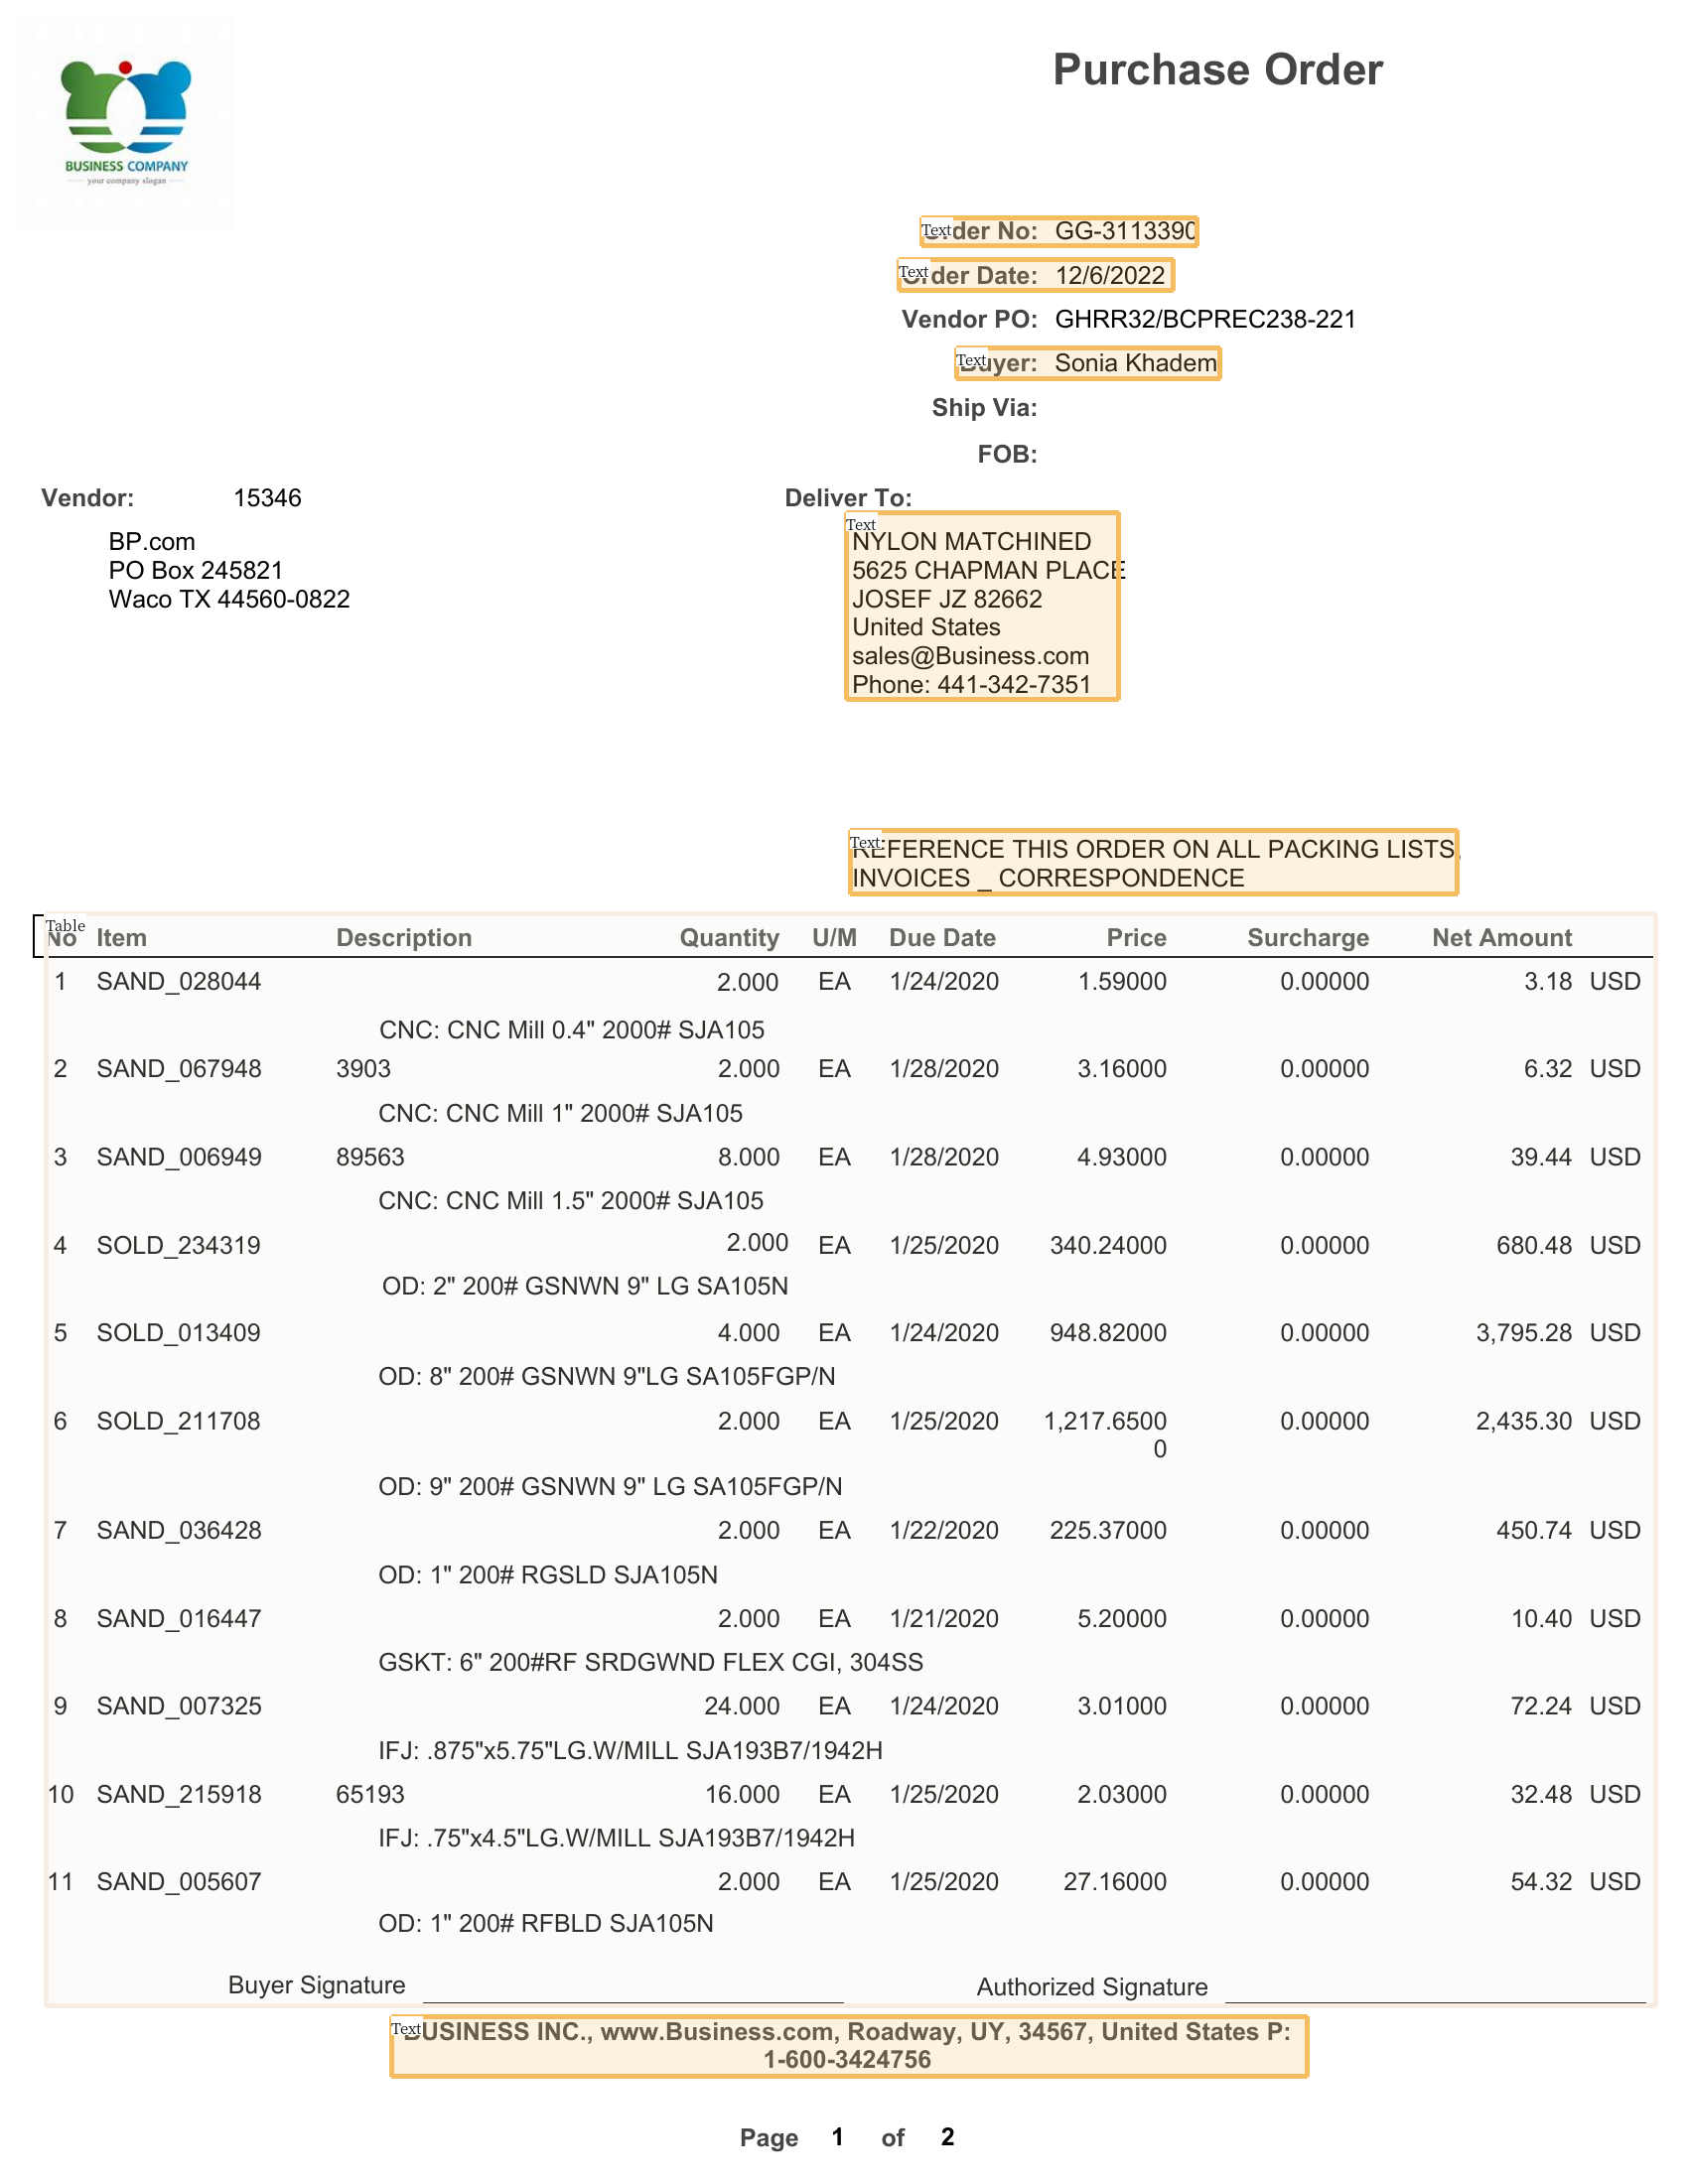

In [44]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

layout_result = model.detect(img)

lp.draw_box(img, layout_result,  box_width=5, box_alpha=0.2, show_element_type=True)

In [47]:
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=46.39352035522461, y_1=920.3060302734375, x_2=1667.0067138671875, y_2=2020.8170166015625), text=None, id=None, type=Table, parent=None, next=None, score=0.9979650974273682)], page_data={})

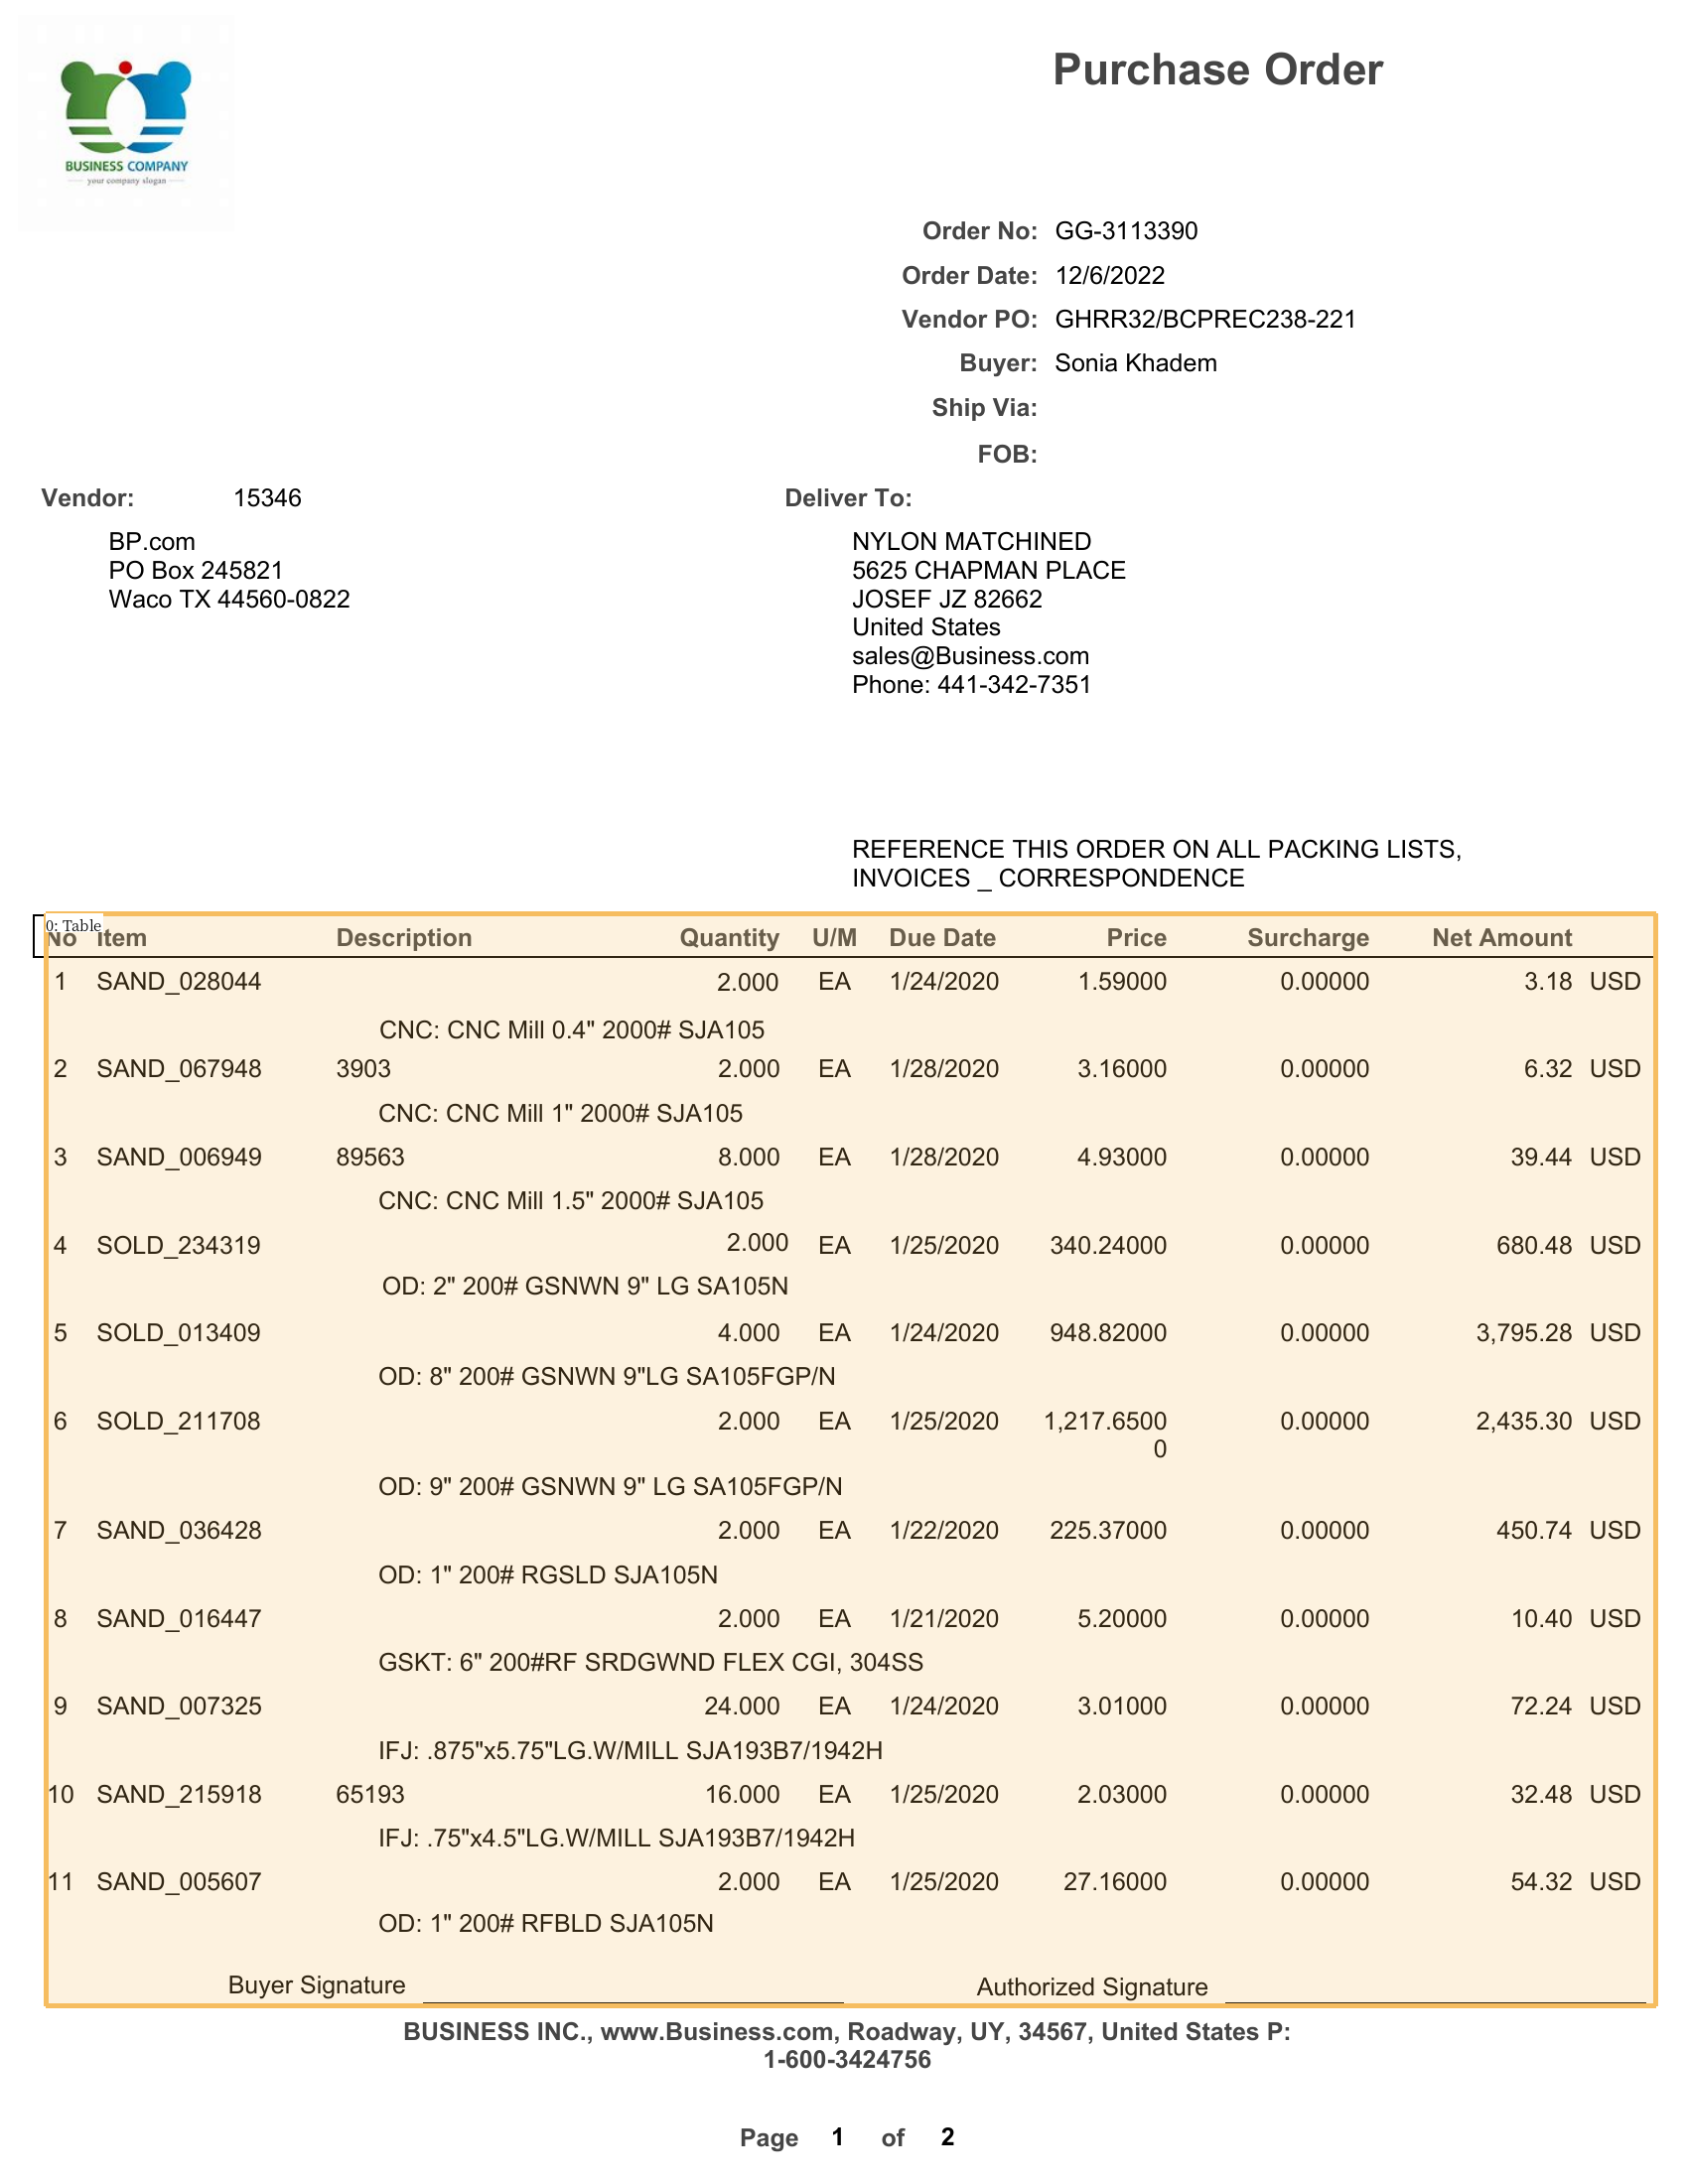

In [48]:
text_blocks = lp.Layout([b for b in layout_result if b.type=='Table'])

lp.draw_box(img, text_blocks,  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)

In [49]:
ocr_agent = lp.TesseractAgent(languages='eng')

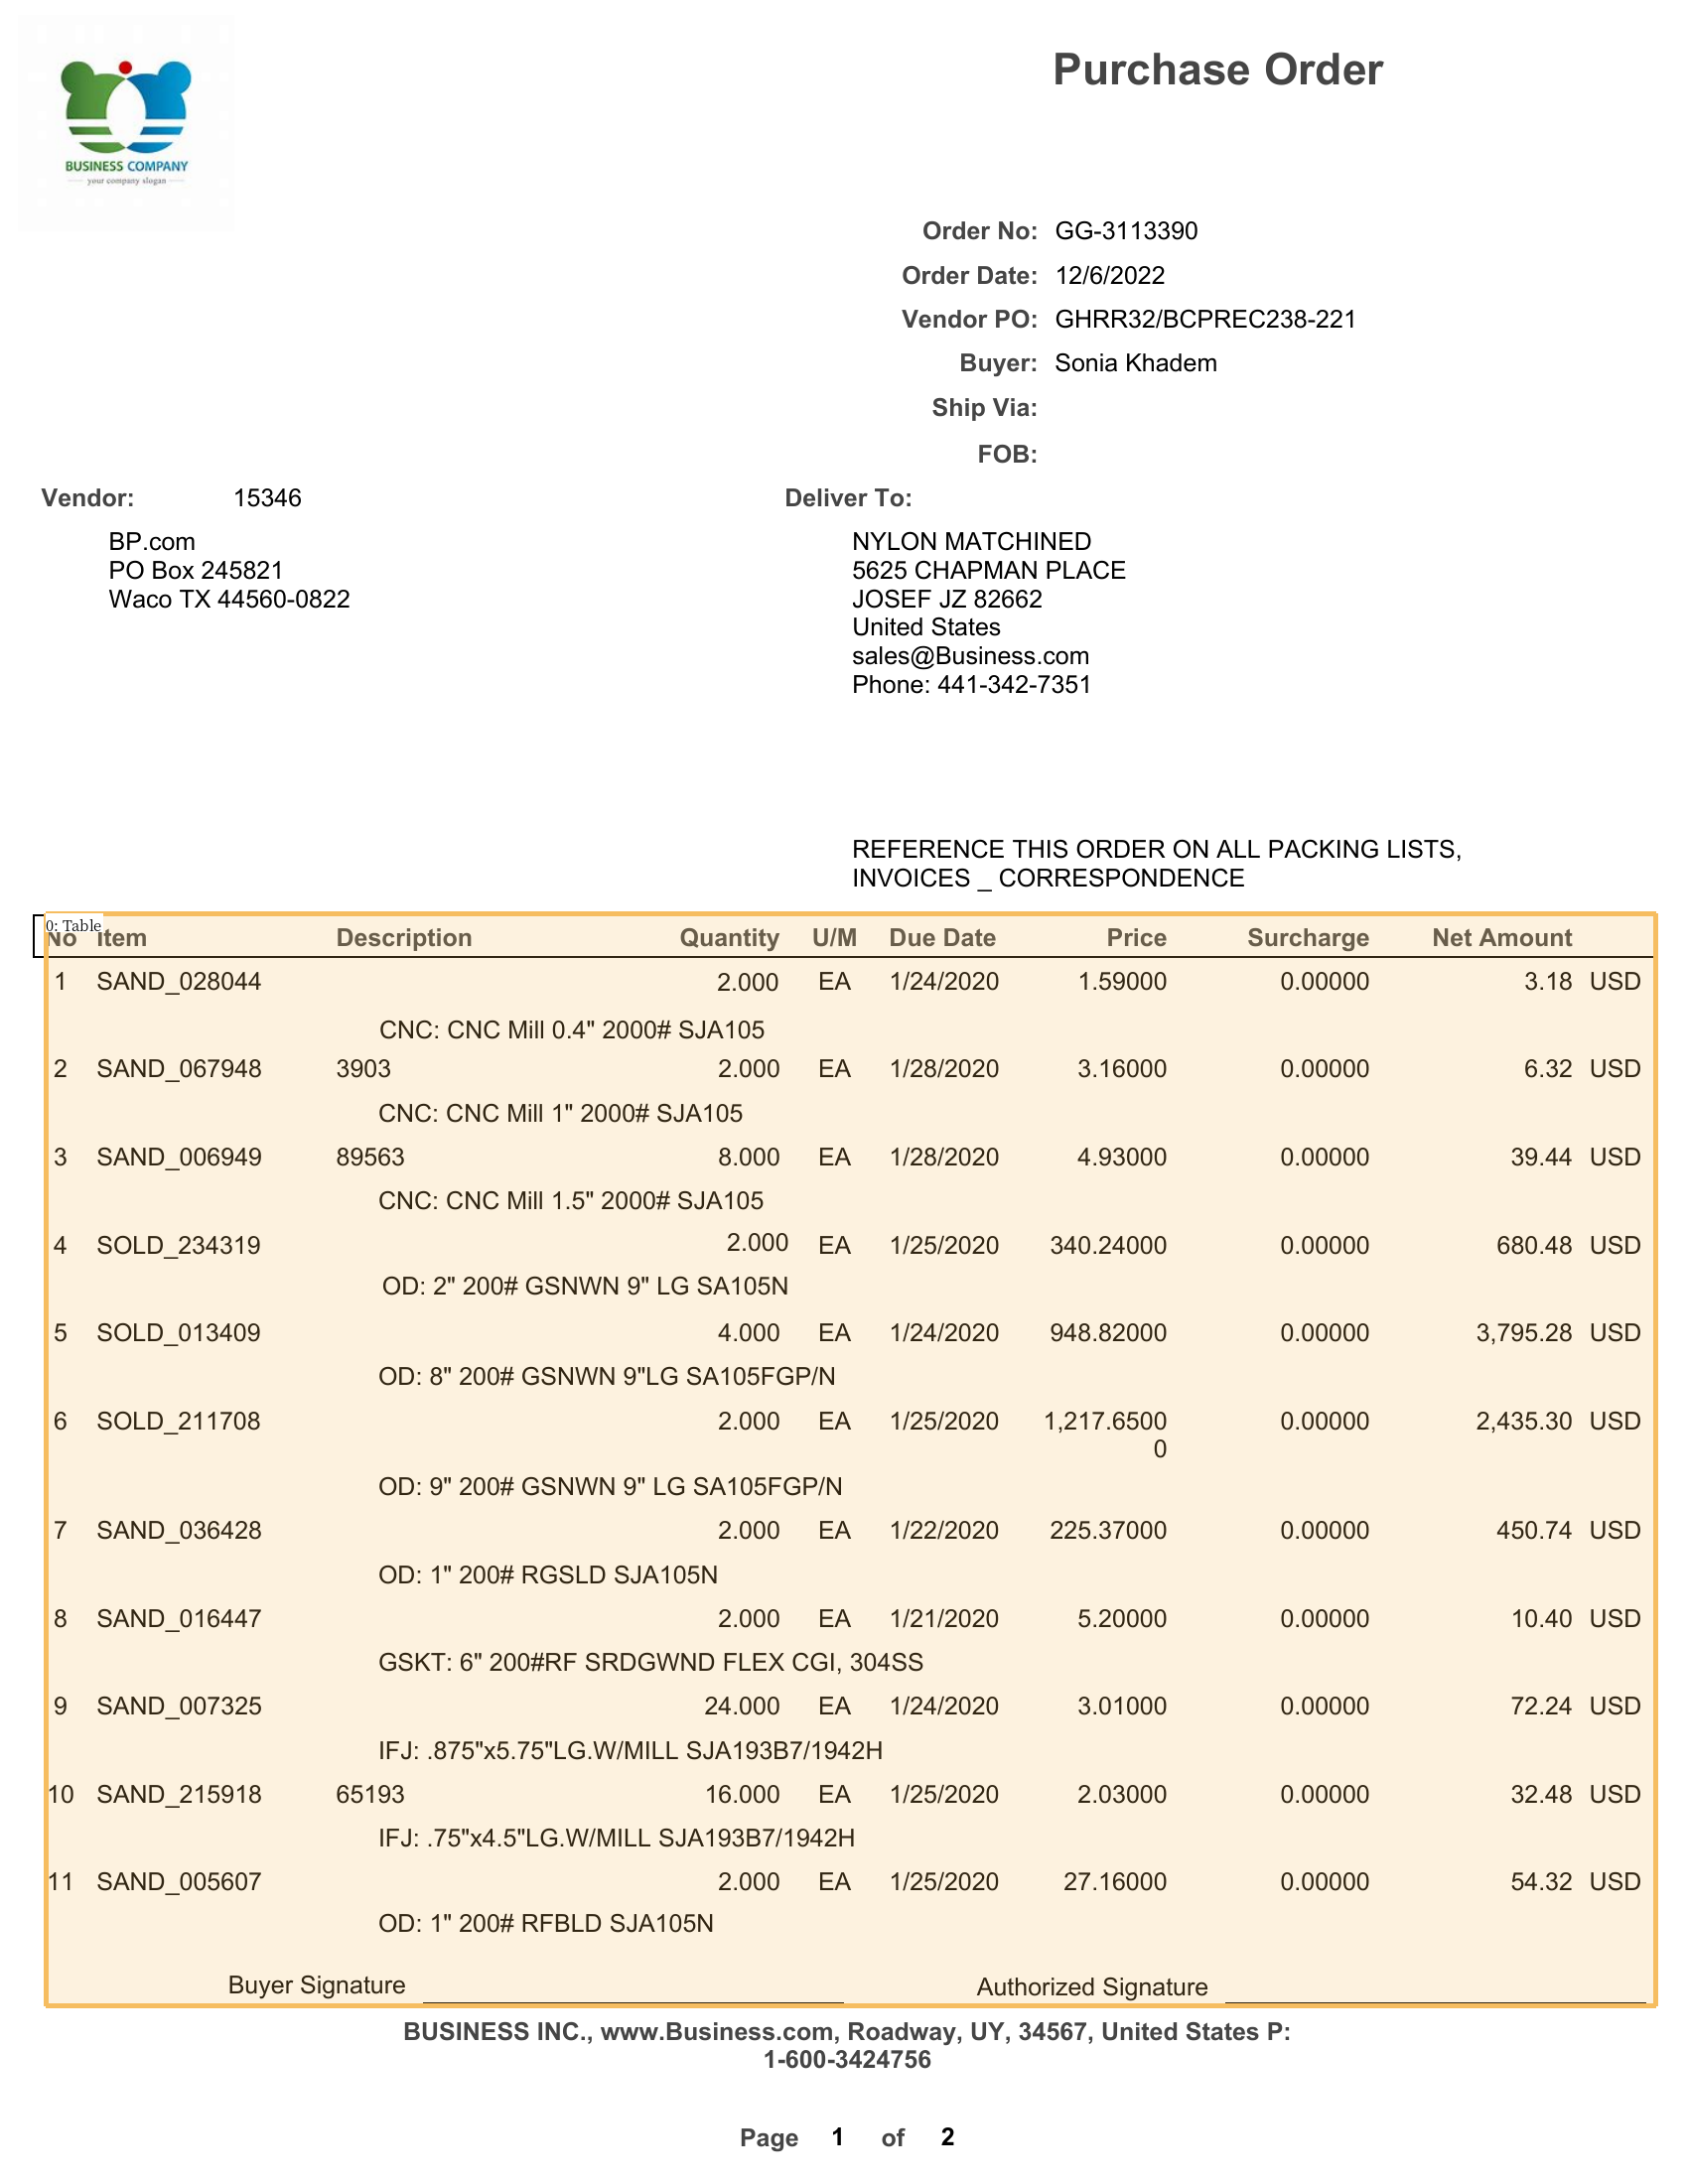

In [50]:
image_width = len(img[0])

# Sort element ID of the left column based on y1 coordinate
left_interval = lp.Interval(0, image_width/2, axis='x').put_on_canvas(img)
left_blocks = text_blocks.filter_by(left_interval, center=True)._blocks
left_blocks.sort(key = lambda b:b.coordinates[1])

# Sort element ID of the right column based on y1 coordinate
right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# Sort the overall element ID starts from left column
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

lp.draw_box(img, text_blocks,  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)

In [51]:
for block in text_blocks:

    # Crop image around the detected layout
    segment_image = (block
                       .pad(left=15, right=15, top=5, bottom=5)
                       .crop_image(img))
    
    # Perform OCR
    text = ocr_agent.detect(segment_image)

    # Save OCR result
    block.set(text=text, inplace=True)

In [52]:
for txt in text_blocks:
    print(txt.text, end='\n---\n')

 

 

 

No Item Description Quantity U/M_ Due Date Price Surcharge Net Amount

1 SAND_028044 2.000 EA = 1/24/2020 1.59000 0.00000 3.18 USD
CNC: CNC Mill 0.4" 2000# SJA105

2 SAND_067948 3903 2.000 EA 1/28/2020 3.16000 0.00000 6.32 USD
CNC: CNC Mill 1" 2000# SJA105

3 SAND_006949 89563 8.000 EA 1/28/2020 4.93000 0.00000 39.44 USD
CNC: CNC Mill 1.5" 2000# SJA105

4 SOLD_234319 2.000 EA 1/25/2020 340.24000 0.00000 680.48 USD
OD: 2" 200# GSNWN 9" LG SA105N

5 SOLD_013409 4.000 EA 1/24/2020 948.82000 0.00000 3,795.28 USD
OD: 8" 200# GSNWN 9"LG SA105FGP/N

6 SOLD_211708 2.000 EA 1/25/2020 1,217-6508 0.00000 2,435.30 USD
OD: 9" 200# GSNWN 9" LG SA105FGP/N

7 SAND_036428 2.000 EA 1/22/2020 225.37000 0.00000 450.74 USD
OD: 1" 200# RGSLD SJA105N

8 SAND_016447 2.000 EA 1/21/2020 5.20000 0.00000 10.40 USD
GSKT: 6" 200#RF SRDGWND FLEX CGI, 304SS

9 SAND_007325 24.000 EA 1/24/2020 3.01000 0.00000 72.24 USD
IFJ: .875"x5.75"LG.W/MILL SJA193B7/1942H

10 SAND_215918 65193 16.000 EA 1/25/2020 2.03000 0

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
pdf_file_2= 'First.pdf' # Adjust the filepath of your input image accordingly
img_2 = np.asarray(pdf2image.convert_from_path(pdf_file)[0])

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


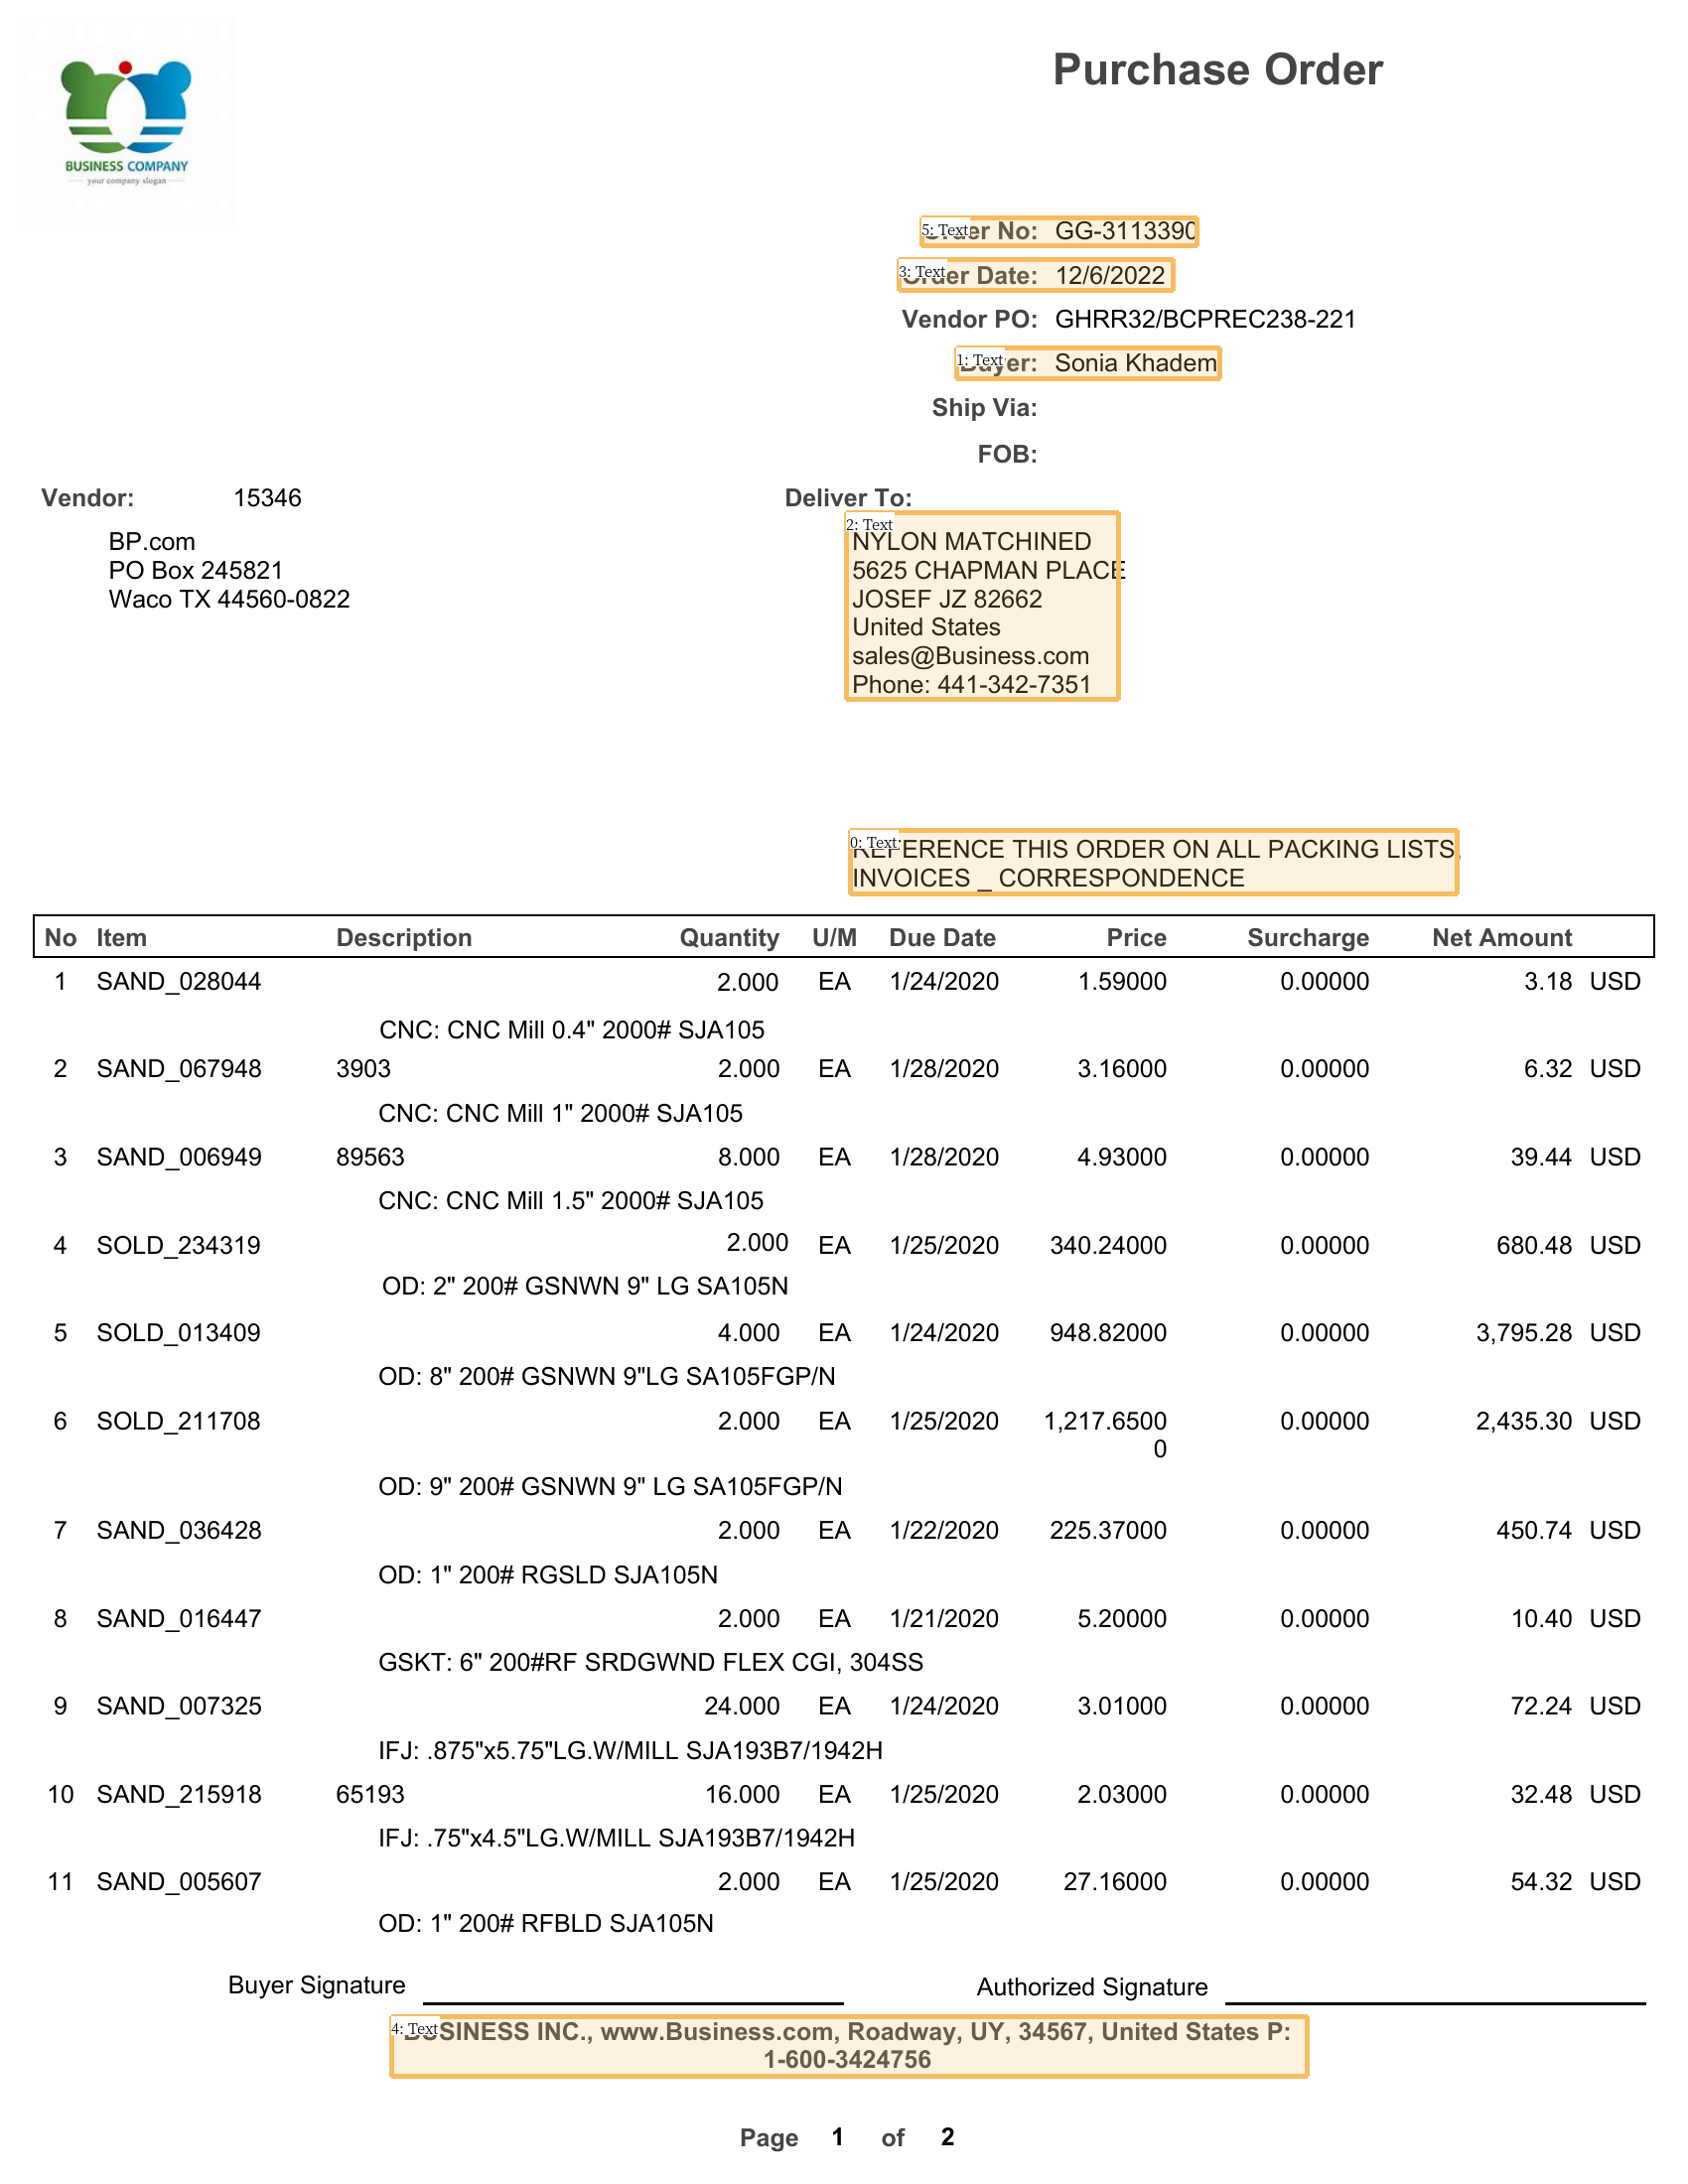

In [17]:
layout_result_2 = model.detect(img_2)

text_blocks_2 = lp.Layout([b for b in layout_result_2 if b.type=='Text'])

lp.draw_box(img_2, text_blocks_2,  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)

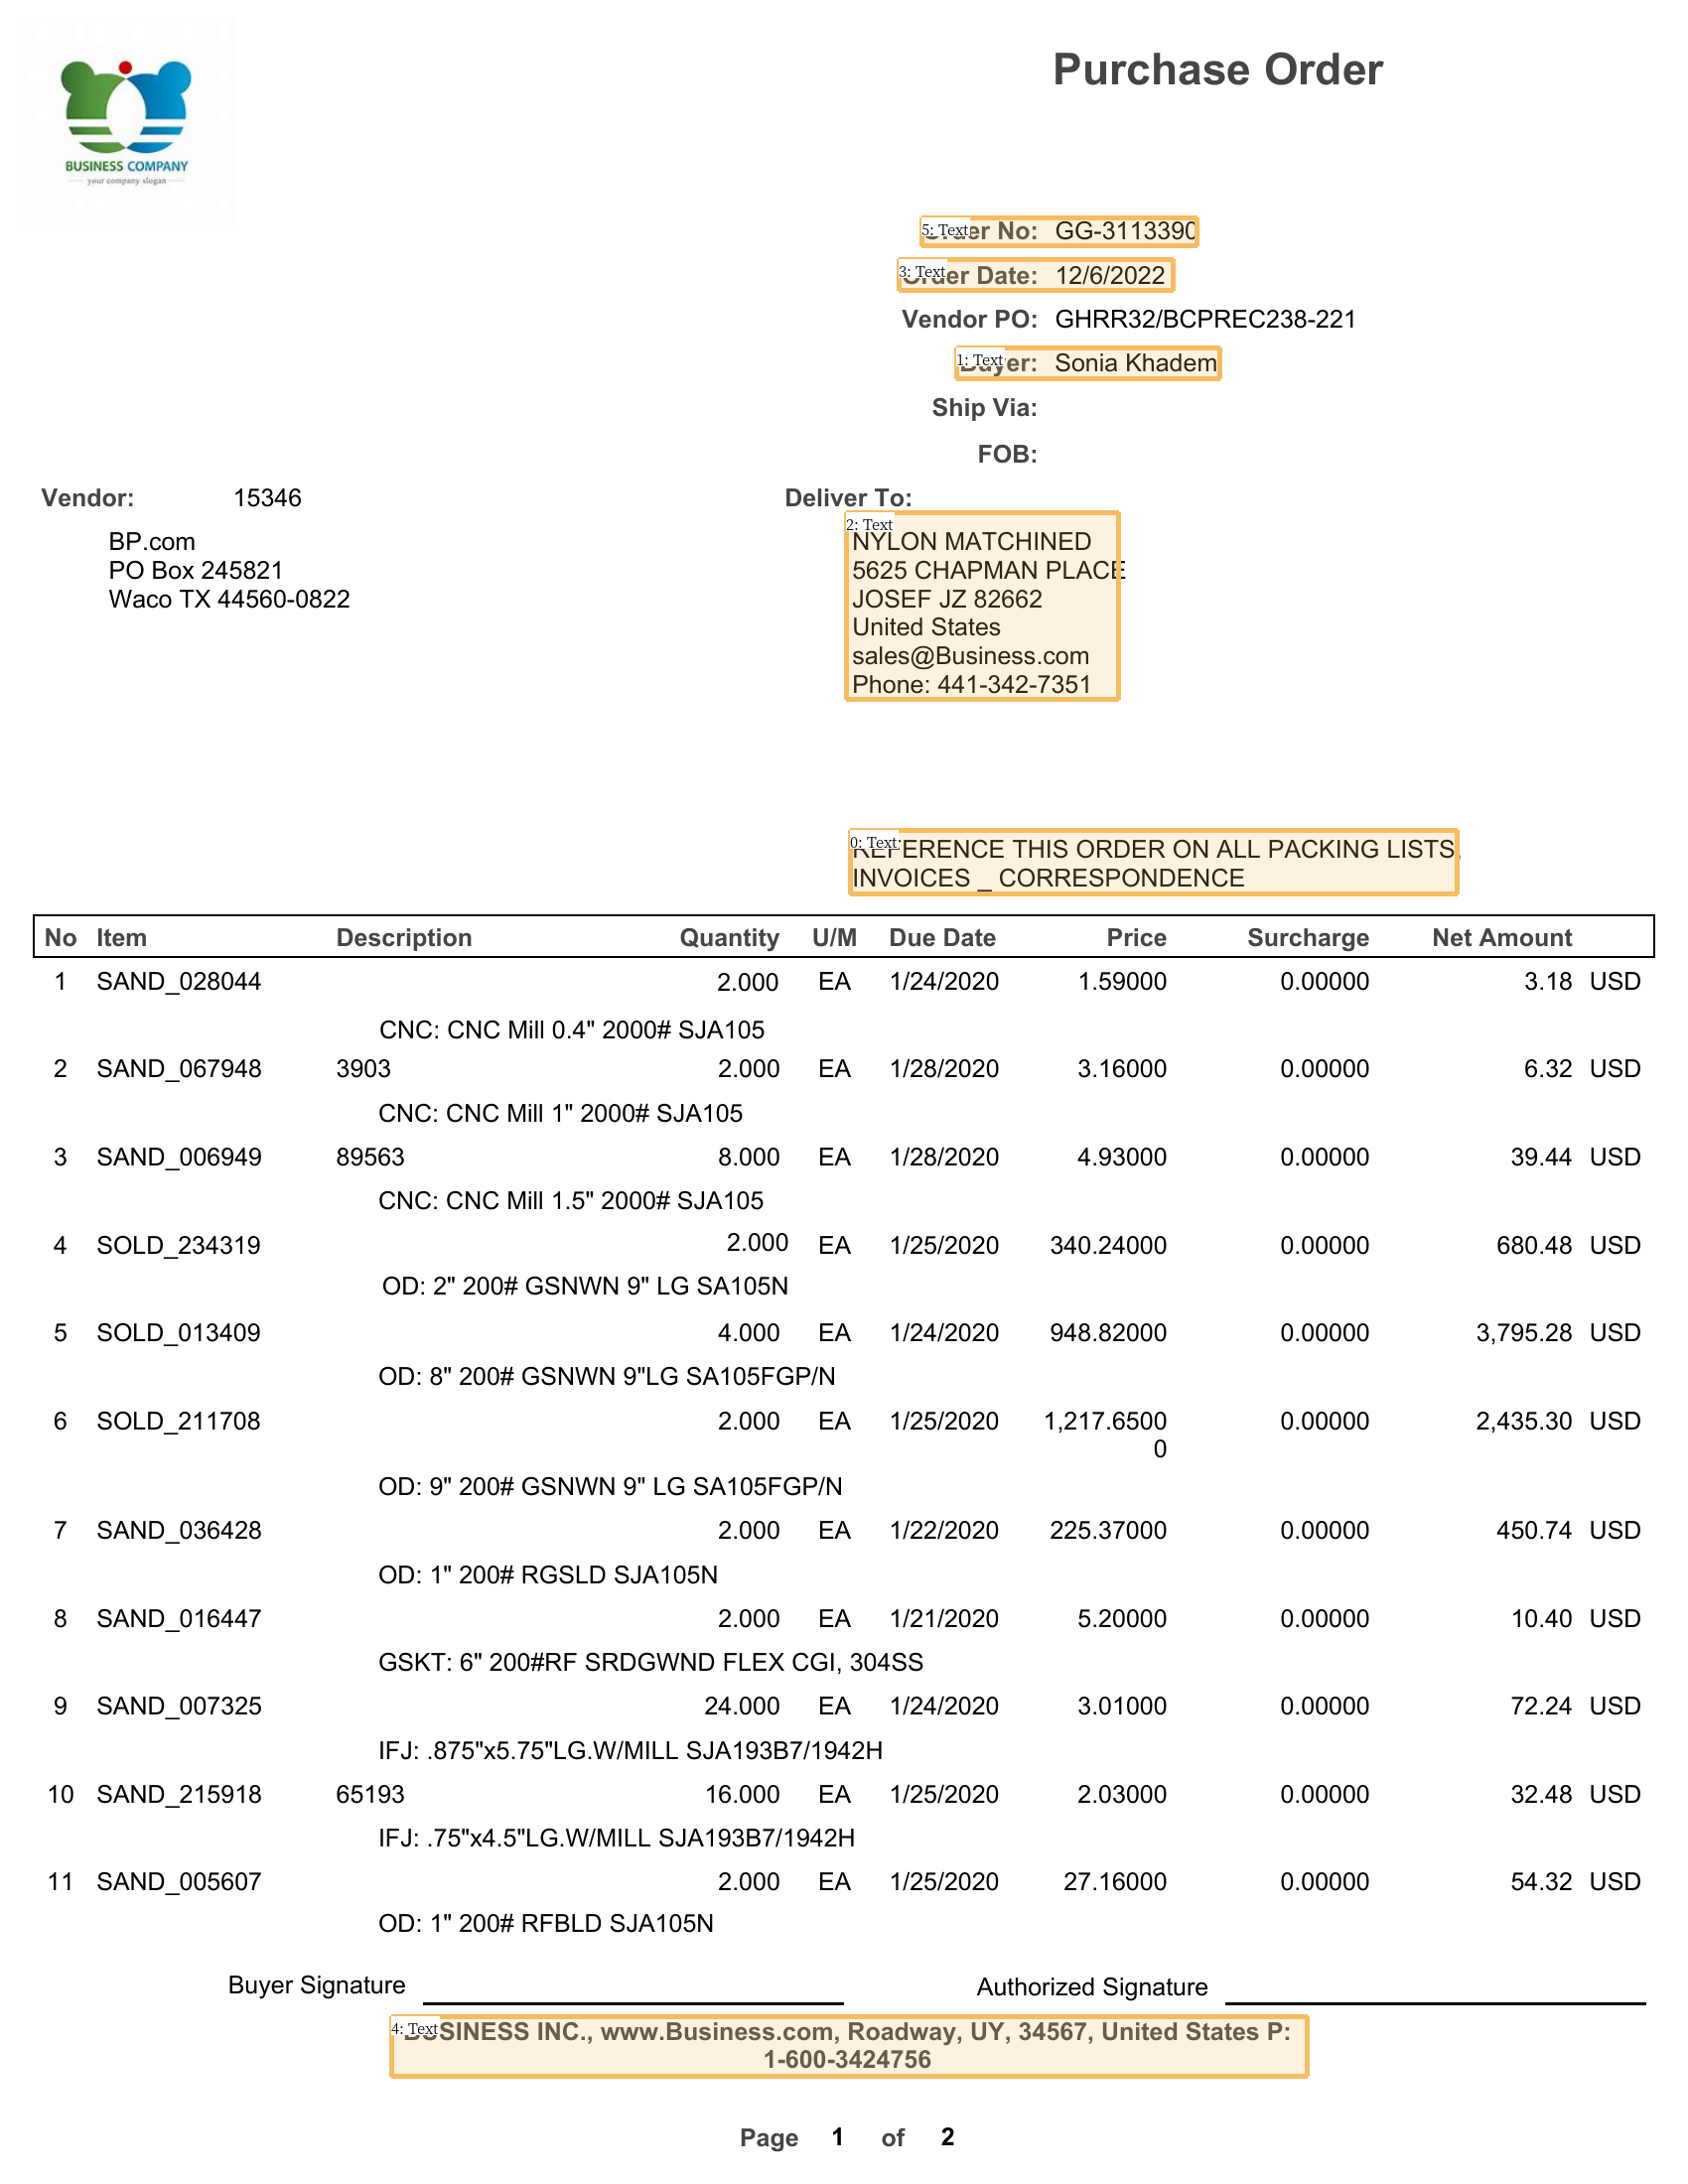

In [18]:
def set_coordinate(data):

  x1 = data.block.x_1
  y1 = data.block.y_1
  x2 = data.block.x_2
  y2 = data.block.y_2

  return torch.tensor([[x1, y1, x2, y2]], dtype=torch.float)

def compute_iou(box_1, box_2):

  return bops.box_iou(box_1, box_2)

def compute_area(box):

    width = box.tolist()[0][2] - box.tolist()[0][0]
    length = box.tolist()[0][3] - box.tolist()[0][1]
    area = width*length

    return area

def refine(block_1, block_2):

  bb1 = set_coordinate(block_1)
  bb2 = set_coordinate(block_2)

  iou = compute_iou(bb1, bb2)

  if iou.tolist()[0][0] != 0:

    a1 = compute_area(bb1)
    a2 = compute_area(bb2)

    block_2.set(type='None', inplace= True) if a1 > a2 else block_1.set(type='None', inplace= True)
    

for layout_i in text_blocks_2:
  
    for layout_j in text_blocks_2:
      
        if layout_i != layout_j: 

            refine(layout_i, layout_j)
            
text_blocks_2 = lp.Layout([b for b in text_blocks_2 if b.type=='Text'])

lp.draw_box(img_2, text_blocks_2,  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)

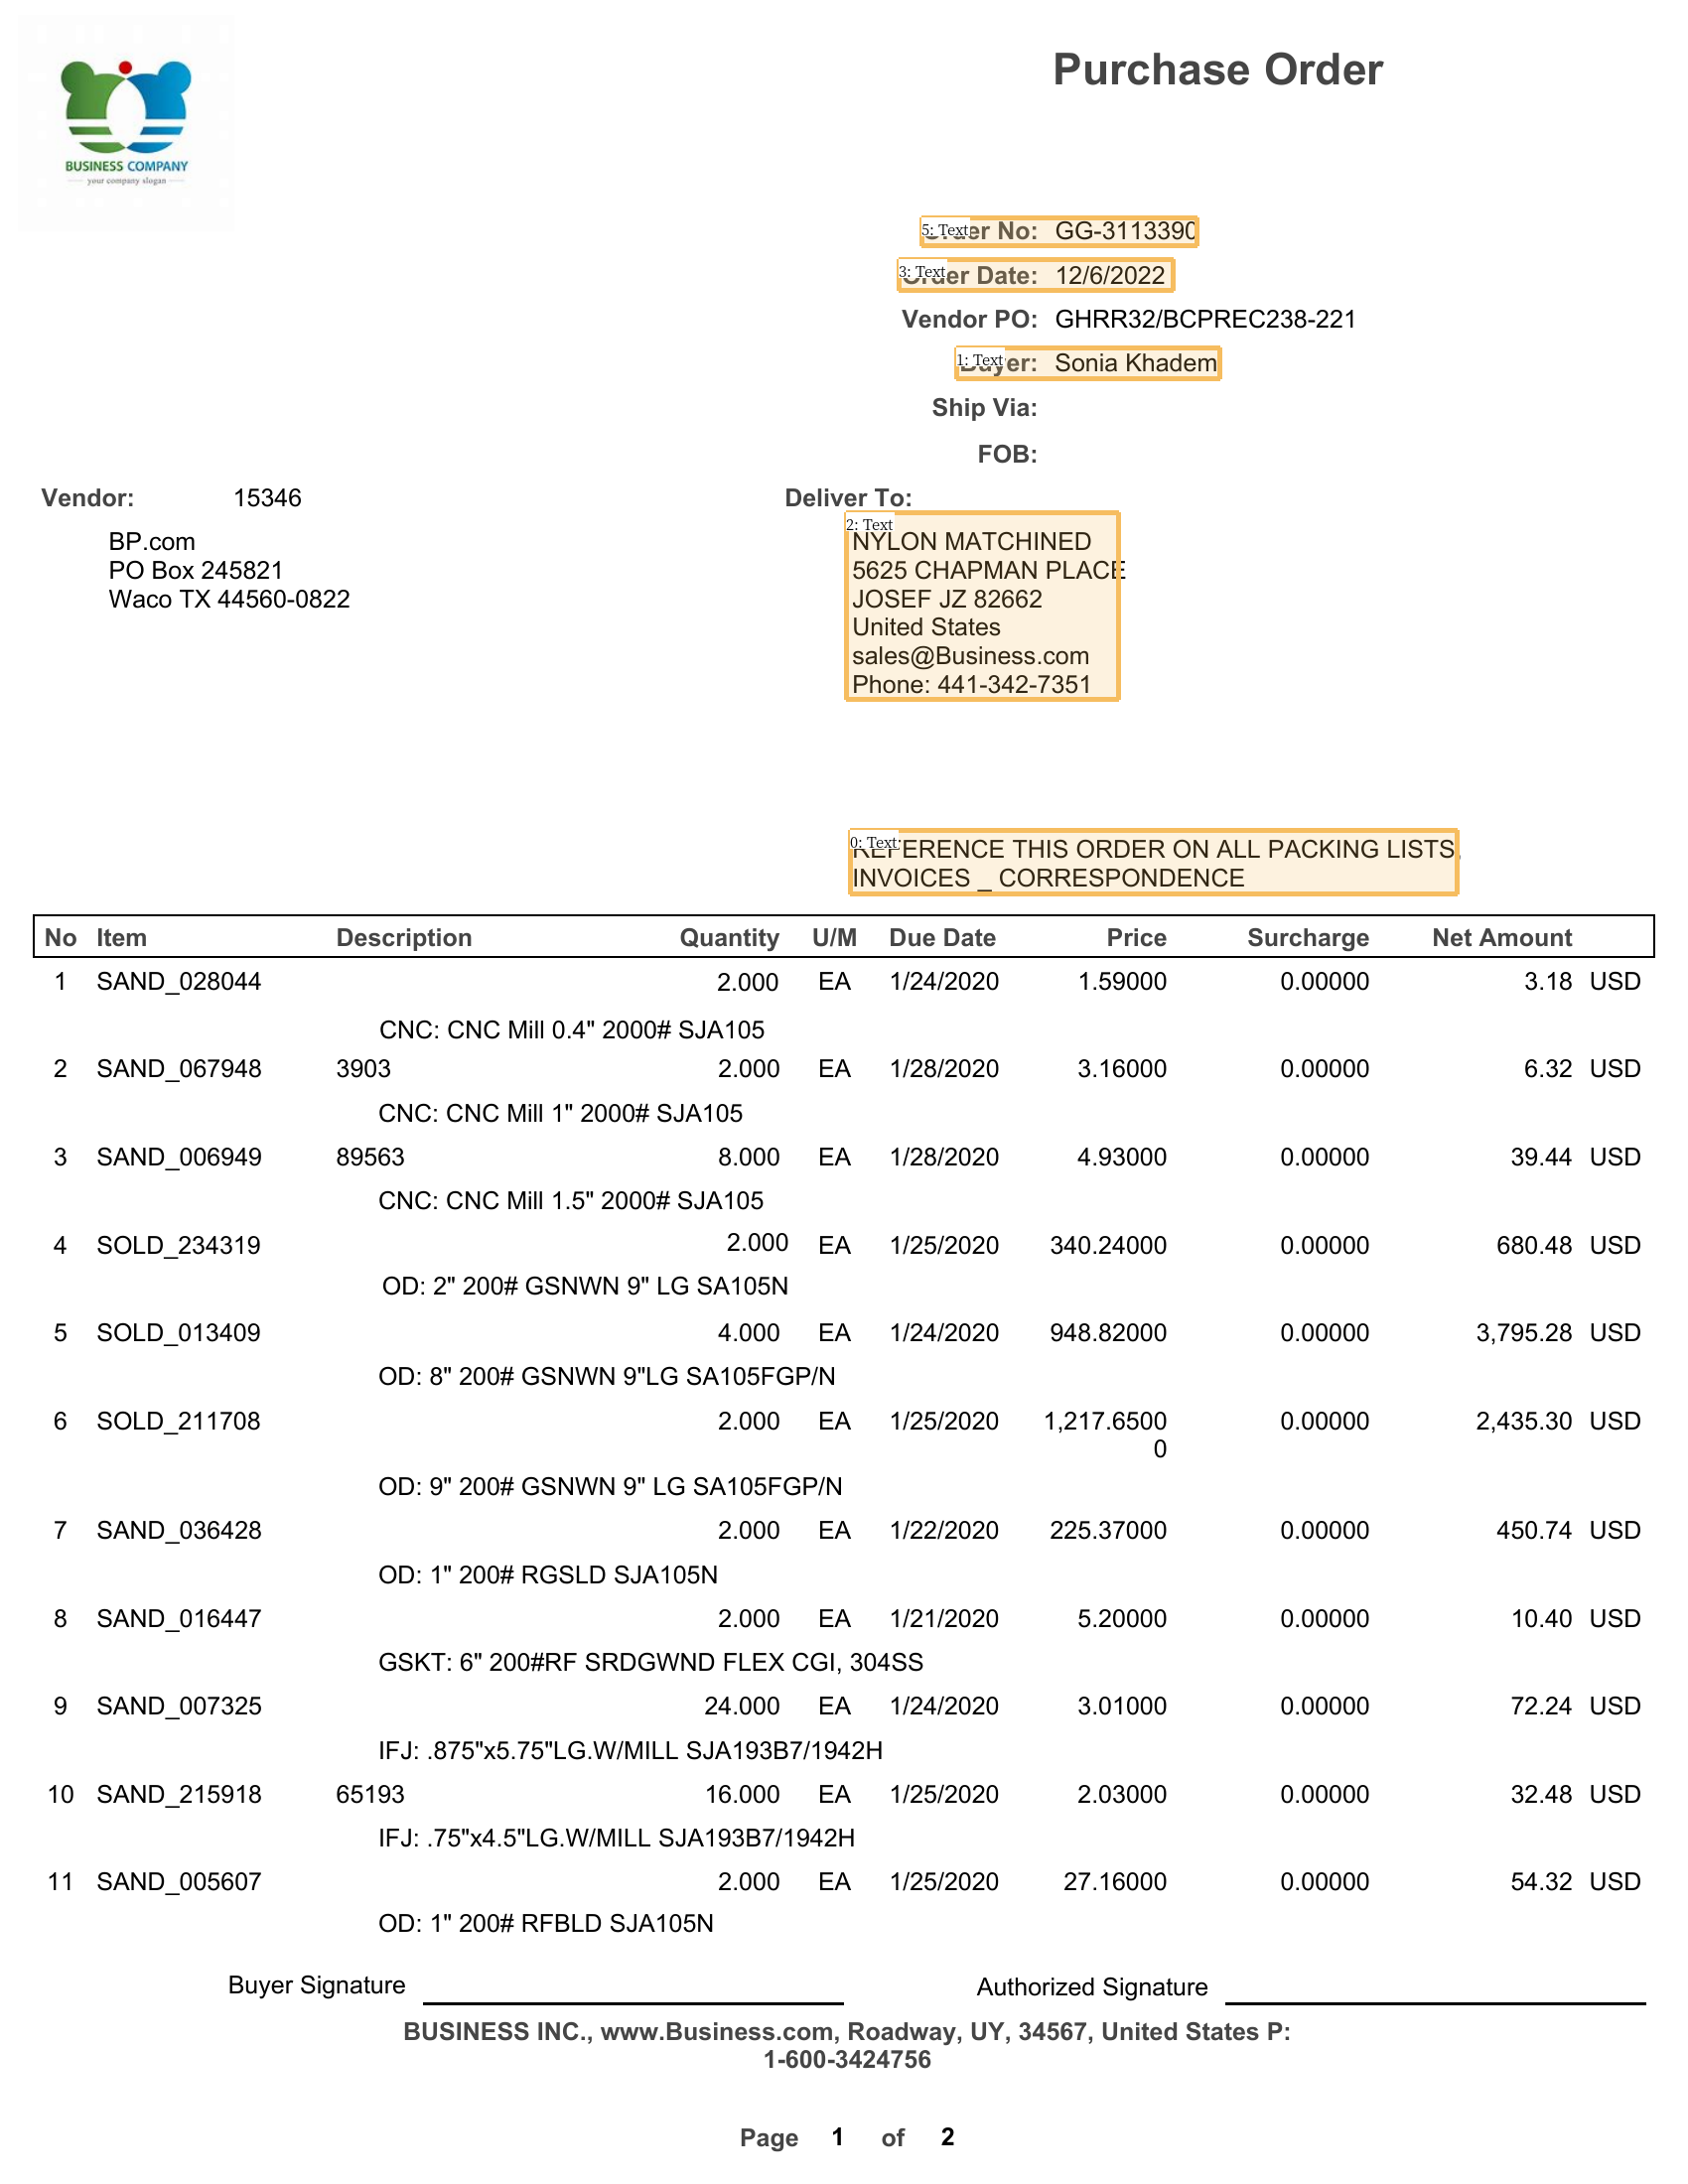

In [19]:
text_blocks_2 = lp.Layout([b.set(id = idx) for idx, b in enumerate(text_blocks_2)])

# From the visualization, let's say we know that layout 
# with 'Diameter Thickness' text has element ID of 4

text_blocks_2[4].set(type='None', inplace=True)
text_blocks_2 = lp.Layout([b for b in text_blocks_2 if b.type=='Text'])

lp.draw_box(img_2, text_blocks_2,  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)